In [1]:
from tools import *

devices: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
prepare_dirs(task='training')

Downloading...
From (original): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M
From (redirected): https://drive.google.com/uc?id=1TnV9sAX2My-R3iSGamX3rVAezoBsGY_M&confirm=t&uuid=5ad4face-e45f-448d-a7b3-6e5314ba2183
To: D:\virtualenv\src\thesis\cmapss\training\gru\input\CMAPSSData\FD001.zip
100%|█████████████████████████████████████████████████████████████████████████████| 29.5M/29.5M [00:03<00:00, 8.17MB/s]


Extracting FD001.zip...
Extraction complete: ./input\CMAPSSData
Input directory
'./input'
URL input dataset
'https://drive.google.com/file/d/1LU1DQuv7_CzBy2_Abgjg3HsvNDme361O/view?usp=drive_link'
Input dataset directory
'./input\\CMAPSSData'
Output directory
'./working'
Output models directory
'./working\\models'
Output plots directory
'./working\\plots'


In [3]:
data_ftype = '.npy'

ts_train_features_name = 'ts_train_features' + data_ftype
ts_train_features_path = os.path.join(dataset_dir, ts_train_features_name)
ts_train_targets_name = 'ts_train_targets' + data_ftype
ts_train_targets_path = os.path.join(dataset_dir, ts_train_targets_name)

ts_val_features_name = 'ts_val_features' + data_ftype
ts_val_features_path = os.path.join(dataset_dir, ts_val_features_name)
ts_val_targets_name = 'ts_val_targets' + data_ftype
ts_val_targets_path = os.path.join(dataset_dir, ts_val_targets_name)

ts_test_features_name = 'ts_test_features' + data_ftype
ts_test_features_path = os.path.join(dataset_dir, ts_test_features_name)
ts_test_targets_name = 'ts_test_targets' + data_ftype
ts_test_targets_path = os.path.join(dataset_dir, ts_test_targets_name)

ts_train_features = np.load(ts_train_features_path)
ts_train_targets = np.load(ts_train_targets_path)

ts_val_features = np.load(ts_val_features_path)
ts_val_targets = np.load(ts_val_targets_path)

ts_test_features = np.load(ts_test_features_path)
ts_test_targets = np.load(ts_test_targets_path)

In [4]:
nprint("Training features shape", ts_train_features.shape)
nprint("Training targets shape", ts_train_targets.shape)
nprint("Validation features shape", ts_val_features.shape)
nprint("Validation targets shape", ts_val_targets.shape)
nprint("Testing features shape", ts_test_features.shape)
nprint("Testing targets shape", ts_test_targets.shape)

Training features shape
(14184, 30, 14)
Training targets shape
(14184,)
Validation features shape
(3547, 30, 14)
Validation targets shape
(3547,)
Testing features shape
(497, 30, 14)
Testing targets shape
(100,)


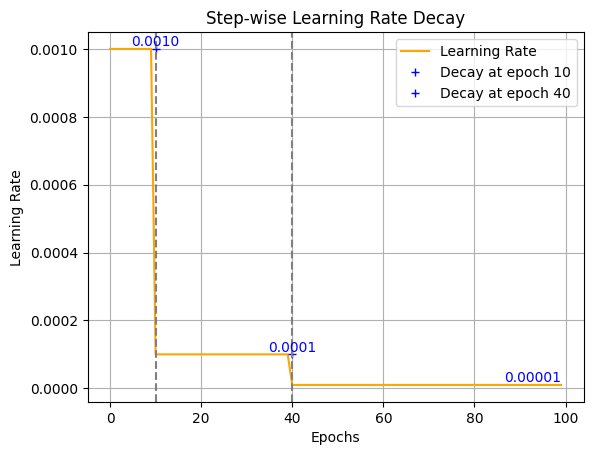

In [5]:
plot_lrdecay()

In [6]:
model = RULEstimator.get_model(
    dataset_name=dataset_name,
    window_length=window_length,
    num_features=ts_train_features.shape[2],
    num_targets=1 if len(ts_train_targets.shape)==1 else ts_train_targets.shape[1],
    loss=loss(),
    optimizer=optimizer()
).build()
model.summary()


start_time = time.time()
nprint('Training started: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
history = model.fit(
    ts_train_features, 
    ts_train_targets, 
    epochs=epochs,
    validation_data=(
        ts_val_features, 
        ts_val_targets
    ),
    callbacks=callbacks(
        scheduler=scheduler, 
        verbose=verbose, 
        stopping_metric='val_loss', 
        patience=int((20*epochs)/100)
    ),
    batch_size=batch_size, 
    verbose=verbose
)
nprint('Training ended: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
end_time = time.time()
training_duration = end_time - start_time
nprint('Training duration', '{:.2f} seconds'.format(training_duration))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 128)             │          55,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 30, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 96)                  │           3,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,665 (459.63 KB)

 Trainable params: 117,665 (459.63 KB)

 Non-trainable params: 0 (0.00 B)

Training started: 
'2024-11-28 17:12:47'

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - loss: 5746.4097 - val_loss: 1759.3710 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - loss: 1341.7781 - val_loss: 294.0870 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 278.8251 - val_loss: 198.2851 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - loss: 206.5814 - val_loss: 222.6319 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - loss: 200.4139 - val_loss: 188.9584 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learnin

In [7]:
modeltype = 'GRU'

gru_model_name = '{}_{}'.format(dataset_name, modeltype)
gru_model_files_dir = os.path.join(out_models_dir, gru_model_name)
os.makedirs(gru_model_files_dir)

In [8]:
ftype = 'keras'
gru_model_file_name = '{}.{}'.format(gru_model_name, ftype)
gru_model_path = os.path.join(gru_model_files_dir, gru_model_file_name)
model.save(filepath=gru_model_path)
nprint('GRU model path', gru_model_path)

GRU model path
'./working\\models\\FD001_GRU\\FD001_GRU.keras'


GRU model history path
'./working\\models\\FD001_GRU\\FD001_GRU_history.json'
      loss   val_loss  learning_rate  epoch
148.683975 149.582794        0.00001     95
148.729706 149.715240        0.00001     96
148.629562 150.285339        0.00001     97
148.680573 149.755554        0.00001     98
148.637543 149.863968        0.00001     99


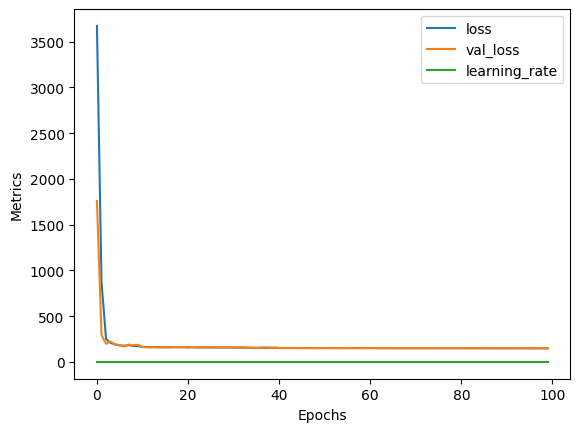

In [9]:
ftype = 'json'
gru_model_history_name = '{}_{}_{}.{}'.format(dataset_name, modeltype, 'history', ftype) 
gru_model_history_path = os.path.join(gru_model_files_dir, gru_model_history_name)
with open(gru_model_history_path, "w") as file: 
    json.dump({'history': history.history}, file, indent=4)
nprint('GRU model history path', gru_model_history_path)
display_training_performance(history)

In [10]:
ftype = 'zip'
shutil.make_archive(gru_model_files_dir, ftype, gru_model_files_dir)
shutil.rmtree(gru_model_files_dir)